<font color='green' size = 5> Comparison Between Simulator and Hardware</font>

Here I will run a quantum circuit on the aer simulator, and also on real hardware. At the end I will compare the results.

In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2); cr = ClassicalRegister(2);

In [3]:
circuit = QuantumCircuit(qr,cr);

In [4]:
%matplotlib inline

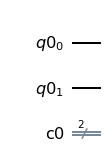

In [5]:
circuit.draw(output='mpl')

In [6]:
circuit.h(qr[0]);

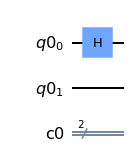

In [7]:
circuit.draw(output='mpl')

In [8]:
circuit.cx(qr[0],qr[1]);

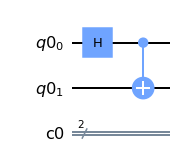

In [9]:
circuit.draw(output='mpl')

In [10]:
circuit.measure(qr,cr);

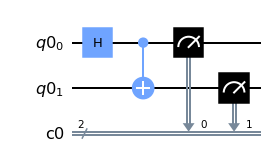

In [11]:
circuit.draw(output='mpl')

In [12]:
 simulator = Aer.get_backend('qasm_simulator')

In [13]:
result = execute(circuit, backend=simulator).result()

In [14]:
from qiskit.tools.visualization import plot_histogram; from qiskit.providers.ibmq import least_busy;

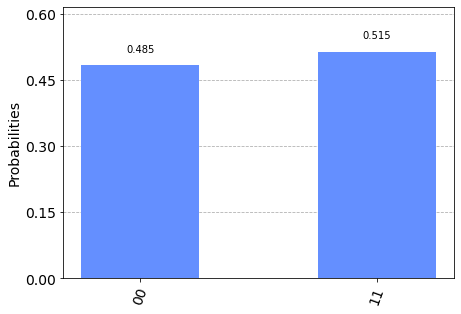

In [15]:
plot_histogram(result.get_counts(circuit))

In [16]:
IBMQ.load_account();

In [17]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [18]:
provider.backends(); nqubits = 2;

In [19]:
least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
and not x.configuration().simulator and x.status().operational==True))

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
qcomp = provider.get_backend('ibmq_quito'); job = execute(circuit, backend=qcomp)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
job_monitor(job)

Job Status: job has successfully run


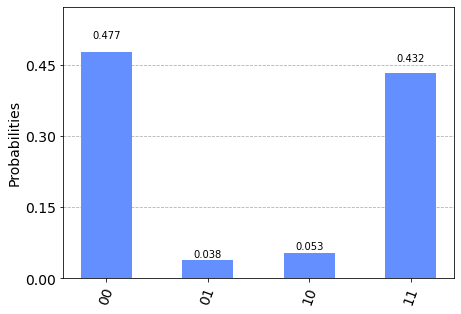

In [23]:
result = job.result();
plot_histogram(result.get_counts(circuit))

Comparing the histograms we see that when we run the circuit on actual hardware, there is error involved and we measure |01> and |10> with non-zero probabilities (these probabilities are zero when we use the simulator, which is the expected result).